<a href="https://colab.research.google.com/github/humairarizqi/Final_Project/blob/main/Copy_of_RFM_Analysis_Final_Project_New_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction**

Pada kesempatan final project kali ini, tim kami memutuskan untuk memilih dataset 1 (satu) untuk menyelesaikan studi kasus marketplace Super App. dengan konteks sebagai berikut:

Sebuah perusahaan Super App terkemuka di Indonesia, yang mengoperasikan layanannya di seluruh provinsi, menghadapi tantangan kompleks dalam mengidentifikasi dan memahami tren serta pola penggunaan aplikasinya yang berbeda-beda di tiap
provinsi. Variasi ini muncul karena setiap provinsi memiliki karakteristik demografis dan ekonomi yang unik, yang mempengaruhi preferensi dan kebutuhan pengguna terhadap
produk yang ditawarkan. Dalam kapasitas sebagai seorang data scientist, diberi tugas untuk melakukan analisis data yang mendalam untuk mengurai dinamika regional yang kompleks. Tujuan akhir dari analisis ini adalah untuk memberikan wawasan yang dapat membantu perusahaan beroperasi lebih efektif dan efisien, serta menyusun strategi yang tepat guna menanggapi kebutuhan pasar yang dinamis dan beragam.

## Business Understanding

**Problem Statement** : Setiap provinsi memiliki preferensi kategori produk yang banyak ditransaksikan. Setiap provinsi juga memiliki tingkatan transaksi yang berbeda. Hal ini disebabkan banyak faktor, seperti tingkat UMR hingga ketersediaan sumber daya masing - masing provinsi. Hal ini mendorong kami untuk menganalisis perilaku transaksi tiap provinsi dan mencari tahu faktor yang mempengaruhi perilaku tersebut serta memberikan saran yang dapat dilakukan oleh perusahaan SuperApp dalam proses keberjalanan transaksi yang terjadi di setiap provinsi.





**Goals/ Business Objective :**

- Memahami retensi perilaku customer
- Segmentasi Customer melalui analisis geospasial
- Identifikasi Trend Penjualan
- Menganalisa insight dalam melihat performa bisnis
- Penyusunan business recommendation untuk mendapatkan engagement customer
- Meningkatkan traffic penjualan dan revenue

# Data Understanding

* **user.csv**: Ini adalah kumpulan data yang
menyediakan informasi terperinci tentang pengguna, termasuk data demografis dan riwayat transaksi. Informasi ini sangat penting dalam memahami perilaku pengguna dan dapat digunakan untuk membuat model perilaku pengguna yang dapat membantu dalam pengambilan keputusan bisnis.


* **location_reference.cs**v: Kumpulan data ini menyediakan detail lokasi geografis yang penting untuk analisis regional. Dengan menggunakan data ini, kita dapat melakukan analisis geospasial untuk memahami pola dan tren regional, yang dapat memberikan wawasan berharga untuk strategi pemasaran dan penjualan berdasarkan wilayah


* **Trx folder**: Folder ini berisi catatan historis transaksi yang mendetail. Dengan menganalisis data ini, kita dapat memahami tren pembelian dan pengaruh promosi, yang dapat digunakan untuk merancang dan mengevaluasi strategi promosi yang efektif.


* **product_reference.csv**: Kumpulan data ini menawarkan gambaran lengkap tentang jajaran produk. Dengan menghubungkan data ini dengan preferensi regional, kita dapat memahami hubungan antara preferensi produk dan lokasi, yang dapat digunakan untuk merancang strategi penjualan dan pemasaran yang lebih efektif.

*  id trx = kode pembelian
*  user_id = kode unik customer
*  product_id = kode produk
*  gross_amount = total pendapatan/pemasukan kotor
*  discounts = potongan harga
*  transaction_date = waktu bertransaksi
*  full_name = nama customer
*  gender = jenis kelamin customer
*  money_spent = total uang yang dihabiskan customer
*  refund = pengembalian dana
*  wallet_balance = sisa uang customer yang tersimpan dalam saldo customer
*  join_date = waktu customer bergabung dengan app
*  birth = tanggal lahir customer
*  kode kecamatan = kode kecamatan transaksi app
*  nama provinsi = nama provinsi transaksi app
*  kode provinsi = kode provinsi transaksi app
*  nama kabupaten = nama kabupaten transaksi app
*  kode kabupaten = kode kabupaten transaksi app
*  nama kecamatan = nama kecamatan transaksi app

Dari fitur-fitur diatas dapat sangat berguna untuk analisis mendalam mengenai:
* trend konsumsi (memantau dan menganalisis tren konsumsi
secara real-time untuk memprediksi perubahan dalam permintaan yang dapat mempengaruhi manajemen stok dan inisiatif promosi),
* pemahaman pasar regional (menggali data untuk
mengidentifikasi faktor-faktor yang mempengaruhi keberhasilan produk tertentu di berbagai provinsi menggunakan pemetaan atau spasial effect termasuk memahami pengaruh faktor ekonomi, sosial, dan budaya),
* personalisasi pengalaman pengguna (mengembangkan model prediktif dan segmentasi yang canggih untuk mengelompokkan pengguna berdasarkan perilaku pembelian, preferensi produk, dengan tujuan untuk menyesuaikan tawaran dan komunikasi secara lebih efektif).

Pattern Discovery: ....

# Data Preprocessing

## Import Data

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats
from math import sqrt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import dataset yang akan digunakan
from google.colab import drive
drive.mount('/content/drive')

# Membaca data csv ke dalam DataFrame Pandas
df_dataset = pd.read_csv('/content/drive/MyDrive/Tim 26C Final Project Drive/dataset-1_new.csv')

# Menampilkan DataFrame
df_dataset.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418907 entries, 0 to 2418906
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id_trx            object 
 1   user_id           object 
 2   product_id        int64  
 3   gross_amount      float64
 4   discounts         float64
 5   transaction_date  object 
 6   id                int64  
 7   product name      object 
 8   kode kecamatan    int64  
 9   nama provinsi     object 
 10  kode provinsi     int64  
 11  nama kabupaten    object 
 12  kode kabupaten    int64  
 13  nama kecamatan    object 
 14  full_name         object 
 15  gender            object 
 16  money_spent       float64
 17  refund            float64
 18  wallet_balance    float64
 19  join_date         object 
 20  birth             object 
dtypes: float64(5), int64(5), object(11)
memo

In [ ]:
df_dataset

,id_trx,user_id,product_id,gross_amount,discounts,transaction_date,id,product name,kode kecamatan,nama provinsi,...,nama kabupaten,kode kabupaten,nama kecamatan,full_name,gender,money_spent,refund,wallet_balance,join_date,birth
0,TRX679679,SC3304092002002,1,24500.0,NaN,2024-11-08,1,Man Fashion,330409,JAWA TENGAH,...,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,1690000.0,310000.0,710000.0,2023-11-26,1986-02-01
1,TRX679680,SC3304092002002,1,68800.0,NaN,2024-04-11,1,Man Fashion,330409,JAWA TENGAH,...,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,1690000.0,310000.0,710000.0,2023-11-26,1986-02-01
2,TRX679681,SC3304092002002,1,26700.0,26700.0,2024-07-01,1,Man Fashion,330409,JAWA TENGAH,...,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,1690000.0,310000.0,710000.0,2023-11-26,1986-02-01
3,TRX679682,SC3304092002002,2,27100.0,NaN,2024-02-07,2,Woman Fashion,330409,JAWA TENGAH,...,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,1690000.0,310000.0,710000.0,2023-11-26,1986-02-01
4,TRX679683,SC3304092002002,2,78300.0,NaN,2024-03-12,2,Woman Fashion,330409,JAWA TENGAH,...,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,1690000.0,310000.0,710000.0,2023-11-26,1986-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418902,TRX634418,SC6203092020002,10,1100.0,NaN,2024-01-05,10,"Transportasi (Kereta, Pesawat, Kapal)",620309,KALIMANTAN TENGAH,...,KAPUAS,6203,MANTANGAI,KENNY,perempuan,0.0,0.0,0.0,2024-10-22,2005-06-09
2418903,TRX634419,SC6203092020002,10,2600.0,NaN,2024-07-09,10,"Transportasi (Kereta, Pesawat, Kapal)",620309,KALIMANTAN TENGAH,...,KAPUAS,6203,MANTANGAI,KENNY,perempuan,0.0,0.0,0.0,2024-10-22,2005-06-09
2418904,TRX595914,SC6204012005001,6,12200.0,NaN,2024-06-18,6,Travel,620401,KALIMANTAN TENGAH,...,BARITO SELATAN,6204,JENAMAS,ILHAM SUPRATIKNO S.H.,laki-laki,1430000.0,990000.0,1380000.0,2023-12-08,1993-12-09
2418905,TRX595915,SC6204012005001,6,1600.0,NaN,2024-04-04,6,Travel,620401,KALIMANTAN TENGAH,...,BARITO SELATAN,6204,JENAMAS,ILHAM SUPRATIKNO S.H.,laki-laki,1430000.0,990000.0,1380000.0,2023-12-08,1993-12-09


In [ ]:
df_dataset.drop(['id', 'money_spent', 'refund', 'wallet_balance'], axis=1, inplace=True)

In [ ]:
df_dataset.rename(columns={'product name' : 'product_name',
                            'nama provinsi':'nama_provinsi',
                            'nama kecamatan' : 'nama_kecamatan',
                            'kode kecamatan' : 'kode_kecamatan',
                            'kode provinsi' : 'kode_provinsi',
                            'nama kabupaten' : 'nama_kabupaten',
                            'kode kabupaten' : 'kode_kabupaten',
                            }, inplace = True)
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418907 entries, 0 to 2418906
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id_trx            object 
 1   user_id           object 
 2   product_id        int64  
 3   gross_amount      float64
 4   discounts         float64
 5   transaction_date  object 
 6   product_name      object 
 7   kode_kecamatan    int64  
 8   nama_provinsi     object 
 9   kode_provinsi     int64  
 10  nama_kabupaten    object 
 11  kode_kabupaten    int64  
 12  nama_kecamatan    object 
 13  full_name         object 
 14  gender            object 
 15  join_date         object 
 16  birth             object 
dtypes: float64(2), int64(4), object(11)
memory usage: 313.7+ MB


In [ ]:
grouped_df = df_dataset.groupby('nama_provinsi').size()
print(grouped_df)

nama_provinsi
JAWA TENGAH           2103793
KALIMANTAN SELATAN     176455
KALIMANTAN TENGAH      134616
PAPUA SELATAN            4043
dtype: int64


In [ ]:
df_dataset.head()

,id_trx,user_id,product_id,gross_amount,discounts,transaction_date,product_name,kode_kecamatan,nama_provinsi,kode_provinsi,nama_kabupaten,kode_kabupaten,nama_kecamatan,full_name,gender,join_date,birth
0,TRX679679,SC3304092002002,1,24500.0,NaN,2024-11-08,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01
1,TRX679680,SC3304092002002,1,68800.0,NaN,2024-04-11,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01
2,TRX679681,SC3304092002002,1,26700.0,26700.0,2024-07-01,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01
3,TRX679682,SC3304092002002,2,27100.0,NaN,2024-02-07,Woman Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01
4,TRX679683,SC3304092002002,2,78300.0,NaN,2024-03-12,Woman Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01


## Missing Value

In [ ]:
def missing_data(data):
    df_miss = pd.DataFrame(data.isnull().sum()).reset_index()
    df_miss.columns = ['column', 'count']
    df_miss = df_miss.loc[df_miss['count']!=0]
    df_miss['percent'] = round(df_miss['count']/data.shape[0]*100, 2)
    tipe_data = []
    contoh_data = []
    for kolom in list(df_miss['column']):
        tipe_data.append(data[kolom].dtype)
        contoh_data.append(data[kolom][100])
    df_miss['DataType'] = tipe_data
    df_miss['Example'] = contoh_data
    return df_miss

In [ ]:
missing_data(df_dataset)

,column,count,percent,DataType,Example
3,gross_amount,13831,0.57,float64,18200.0
4,discounts,1655859,68.45,float64,5400.0


In [ ]:
# Melihat Missing Value
missing_values = df_dataset.isnull().sum()
print("Jumlah nilai yang hilang per kolom:")
print(missing_values)

# Menampilkan persentase nilai yang hilang per kolom
total_values = df_dataset.shape[0]
missing_percentage = (missing_values / total_values) * 100
print("\nPersentase nilai yang hilang per kolom:")
print(missing_percentage)

Jumlah nilai yang hilang per kolom:
id_trx                    0
user_id                   0
product_id                0
gross_amount          13831
discounts           1655859
transaction_date          0
product_name              0
kode_kecamatan            0
nama_provinsi             0
kode_provinsi             0
nama_kabupaten            0
kode_kabupaten            0
nama_kecamatan            0
full_name                 0
gender                    0
join_date                 0
birth                     0
dtype: int64

Persentase nilai yang hilang per kolom:
id_trx               0.000000
user_id              0.000000
product_id           0.000000
gross_amount         0.571787
discounts           68.454843
transaction_date     0.000000
product_name         0.000000
kode_kecamatan       0.000000
nama_provinsi        0.000000
kode_provinsi        0.000000
nama_kabupaten       0.000000
kode_kabupaten       0.000000
nama_kecamatan       0.000000
full_name            0.000000
gender        

In [ ]:
# Mengisi nilai yang hilang dengan nilai 0
df_dataset['gross_amount'].fillna(0, inplace=True)
df_dataset['discounts'].fillna(0, inplace=True)

# Menampilkan dataset
df_dataset.head()

,id_trx,user_id,product_id,gross_amount,discounts,transaction_date,product_name,kode_kecamatan,nama_provinsi,kode_provinsi,nama_kabupaten,kode_kabupaten,nama_kecamatan,full_name,gender,join_date,birth
0,TRX679679,SC3304092002002,1,24500.0,0.0,2024-11-08,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01
1,TRX679680,SC3304092002002,1,68800.0,0.0,2024-04-11,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01
2,TRX679681,SC3304092002002,1,26700.0,26700.0,2024-07-01,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01
3,TRX679682,SC3304092002002,2,27100.0,0.0,2024-02-07,Woman Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01
4,TRX679683,SC3304092002002,2,78300.0,0.0,2024-03-12,Woman Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01


In [ ]:
# Melihat missing value
missing_values = df_dataset.isnull().sum()
print("Jumlah nilai yang hilang per kolom:")
print(missing_values)

# Menampilkan persentase nilai yang hilang per kolom
total_values = df_dataset.shape[0]
missing_percentage = (missing_values / total_values) * 100
print("\nPersentase nilai yang hilang per kolom:")
print(missing_percentage)

Jumlah nilai yang hilang per kolom:
id_trx              0
user_id             0
product_id          0
gross_amount        0
discounts           0
transaction_date    0
product_name        0
kode_kecamatan      0
nama_provinsi       0
kode_provinsi       0
nama_kabupaten      0
kode_kabupaten      0
nama_kecamatan      0
full_name           0
gender              0
join_date           0
birth               0
dtype: int64

Persentase nilai yang hilang per kolom:
id_trx              0.0
user_id             0.0
product_id          0.0
gross_amount        0.0
discounts           0.0
transaction_date    0.0
product_name        0.0
kode_kecamatan      0.0
nama_provinsi       0.0
kode_provinsi       0.0
nama_kabupaten      0.0
kode_kabupaten      0.0
nama_kecamatan      0.0
full_name           0.0
gender              0.0
join_date           0.0
birth               0.0
dtype: float64


In [ ]:
def missing_data(data):
    df_miss = pd.DataFrame(data.isnull().sum()).reset_index()
    df_miss.columns = ['column', 'count']
    df_miss = df_miss.loc[df_miss['count']!=0]
    df_miss['percent'] = round(df_miss['count']/data.shape[0]*100, 2)
    tipe_data = []
    contoh_data = []
    for kolom in list(df_miss['column']):
        tipe_data.append(data[kolom].dtype)
        contoh_data.append(data[kolom][100])
    df_miss['DataType'] = tipe_data
    df_miss['Example'] = contoh_data
    return df_miss

In [ ]:
missing_data(df_dataset)

,column,count,percent,DataType,Example


## Duplicate Data

In [ ]:
# Melihat duplicate dataframe
duplikat = df_dataset.duplicated()
duplikat

0          False
1          False
2          False
3          False
4          False
           ...  
2418902    False
2418903    False
2418904    False
2418905    False
2418906    False
Length: 2418907, dtype: bool

In [ ]:
# Untuk melihat baris mana saja yang terindikasi duplikat
duplikat = df_dataset[df_dataset.duplicated()]
duplikat

,id_trx,user_id,product_id,gross_amount,discounts,transaction_date,product_name,kode_kecamatan,nama_provinsi,kode_provinsi,nama_kabupaten,kode_kabupaten,nama_kecamatan,full_name,gender,join_date,birth


Tidak ada data yang terindikasi duplikat

In [ ]:
df_dataset.duplicated().any()

False

## Inconsistent

In [ ]:
# Inconsistent data pada kolom id_trx

def check_consistency(column):
  pattern = re.compile(r'^TRX\d+$') # pola yang diawali dengan TRX diikuti sejumlah angka
  consistent = all(pattern.match(str(value)) for value in column)
  return consistent

# Mengecek konsistensi penulisan data
is_consistent = check_consistency(df_dataset['id_trx'])
if is_consistent:
  print('Semua nilai dalam kolom memiliki cara penulisan yang sama.')
else:
  print('Terdapat variasi pada cara penulisan dalam kolom.')

Semua nilai dalam kolom memiliki cara penulisan yang sama.


# EDA (Exploratory Data Analysis)

## Data yang Sudah Melalui Proses Cleaning

In [ ]:
df_dataset

,id_trx,user_id,product_id,gross_amount,discounts,transaction_date,product_name,kode_kecamatan,nama_provinsi,kode_provinsi,nama_kabupaten,kode_kabupaten,nama_kecamatan,full_name,gender,join_date,birth
0,TRX679679,SC3304092002002,1,24500.0,0.0,2024-11-08,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01
1,TRX679680,SC3304092002002,1,68800.0,0.0,2024-04-11,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01
2,TRX679681,SC3304092002002,1,26700.0,26700.0,2024-07-01,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01
3,TRX679682,SC3304092002002,2,27100.0,0.0,2024-02-07,Woman Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01
4,TRX679683,SC3304092002002,2,78300.0,0.0,2024-03-12,Woman Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418902,TRX634418,SC6203092020002,10,1100.0,0.0,2024-01-05,"Transportasi (Kereta, Pesawat, Kapal)",620309,KALIMANTAN TENGAH,62,KAPUAS,6203,MANTANGAI,KENNY,perempuan,2024-10-22,2005-06-09
2418903,TRX634419,SC6203092020002,10,2600.0,0.0,2024-07-09,"Transportasi (Kereta, Pesawat, Kapal)",620309,KALIMANTAN TENGAH,62,KAPUAS,6203,MANTANGAI,KENNY,perempuan,2024-10-22,2005-06-09
2418904,TRX595914,SC6204012005001,6,12200.0,0.0,2024-06-18,Travel,620401,KALIMANTAN TENGAH,62,BARITO SELATAN,6204,JENAMAS,ILHAM SUPRATIKNO S.H.,laki-laki,2023-12-08,1993-12-09
2418905,TRX595915,SC6204012005001,6,1600.0,0.0,2024-04-04,Travel,620401,KALIMANTAN TENGAH,62,BARITO SELATAN,6204,JENAMAS,ILHAM SUPRATIKNO S.H.,laki-laki,2023-12-08,1993-12-09


In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418907 entries, 0 to 2418906
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id_trx            object 
 1   user_id           object 
 2   product_id        int64  
 3   gross_amount      float64
 4   discounts         float64
 5   transaction_date  object 
 6   product_name      object 
 7   kode_kecamatan    int64  
 8   nama_provinsi     object 
 9   kode_provinsi     int64  
 10  nama_kabupaten    object 
 11  kode_kabupaten    int64  
 12  nama_kecamatan    object 
 13  full_name         object 
 14  gender            object 
 15  join_date         object 
 16  birth             object 
dtypes: float64(2), int64(4), object(11)
memory usage: 313.7+ MB


## Statistical Five Summaries

In [ ]:
df_dataset.describe()

,product_id,gross_amount,discounts,kode_kecamatan,kode_provinsi,kode_kabupaten
count,2.418907e+06,2.418907e+06,2.418907e+06,2.418907e+06,2.418907e+06,2.418907e+06
mean,8.096465e+00,5.677610e+04,9.943020e+03,3.707067e+05,3.690263e+01,3.706976e+03
std,5.515350e+00,9.652759e+04,2.809153e+04,1.014157e+05,1.016086e+01,1.014171e+03
min,1.000000e+00,-1.000000e+02,-1.000000e+02,3.301010e+05,3.300000e+01,3.301000e+03
25%,3.000000e+00,6.400000e+03,0.000000e+00,3.308100e+05,3.300000e+01,3.308000e+03
50%,7.000000e+00,2.100000e+04,0.000000e+00,3.318100e+05,3.300000e+01,3.318000e+03
75%,1.400000e+01,6.440000e+04,7.100000e+03,3.327110e+05,3.300000e+01,3.327000e+03
max,1.800000e+01,2.622800e+06,1.571300e+06,9.303050e+05,9.300000e+01,9.303000e+03


In [ ]:
from scipy import stats

modus_id = stats.mode(df_dataset['product_id'])
print("Jenis produk yang paling banyak dibeli :", modus_id.mode.item())

modus_provinsi = stats.mode(df_dataset['kode_provinsi'])
print("Provinsi dengan transaksi terbanyak :", modus_provinsi.mode.item())

Jenis produk yang paling banyak dibeli : 3
Provinsi dengan transaksi terbanyak : 33


Dari hasil di atas, dapat diambil beberapa informasi yaitu :

1. Jenis produk yang banyak dibeli adalah produk dengan kode 3, yaitu Food & Drink
2. Provinsi dengan jumlah transaksi terbanyak adalah provinsi dengan kode 33, yaitu provinsi Jawa Tengah
3. Rata - rata (mean) diskon dari tiap transaksi sebesar 9943.020

## Boxplot

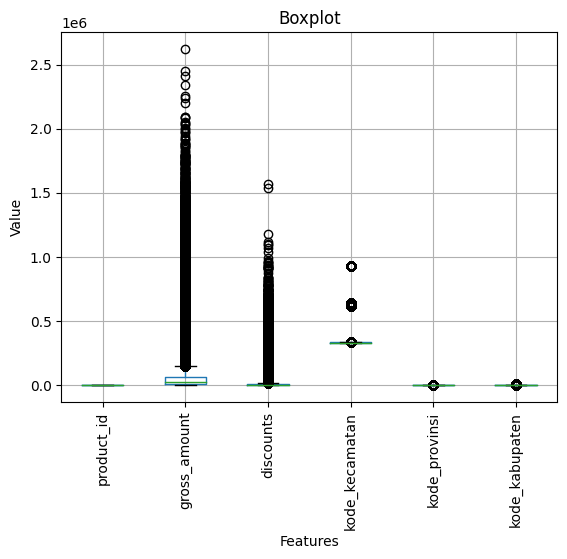

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan boxplot
df_dataset.boxplot()
plt.title('Boxplot')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation = 90)
plt.show()

## Heatmap

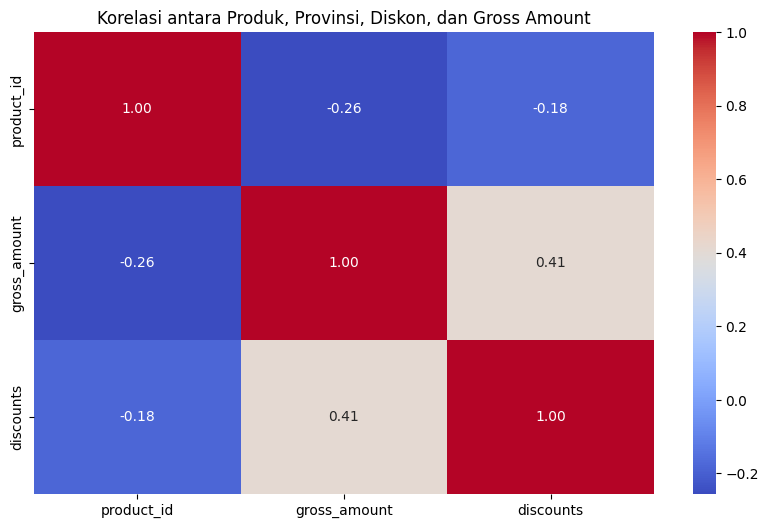

In [ ]:
df = df_dataset[['product_id', 'gross_amount', 'discounts']]
plt.figure(figsize = (10,6))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Korelasi antara Produk, Provinsi, Diskon, dan Gross Amount')
plt.show()

## Melihat Skewness Tiap Fitur

In [ ]:
skew_df = pd.DataFrame(df_dataset.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: stats.skew(df_dataset[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,product_id,0.324842,0.324842,False
1,gross_amount,4.286640,4.286640,True
2,discounts,6.906065,6.906065,True
3,kode_kecamatan,2.305620,2.305620,True
4,kode_provinsi,2.306609,2.306609,True
5,kode_kabupaten,2.305616,2.305616,True


## Melihat Distribusi Data Tiap Fitur

In [ ]:
df_1 = df_dataset.select_dtypes(include = ['float64', 'int64'])

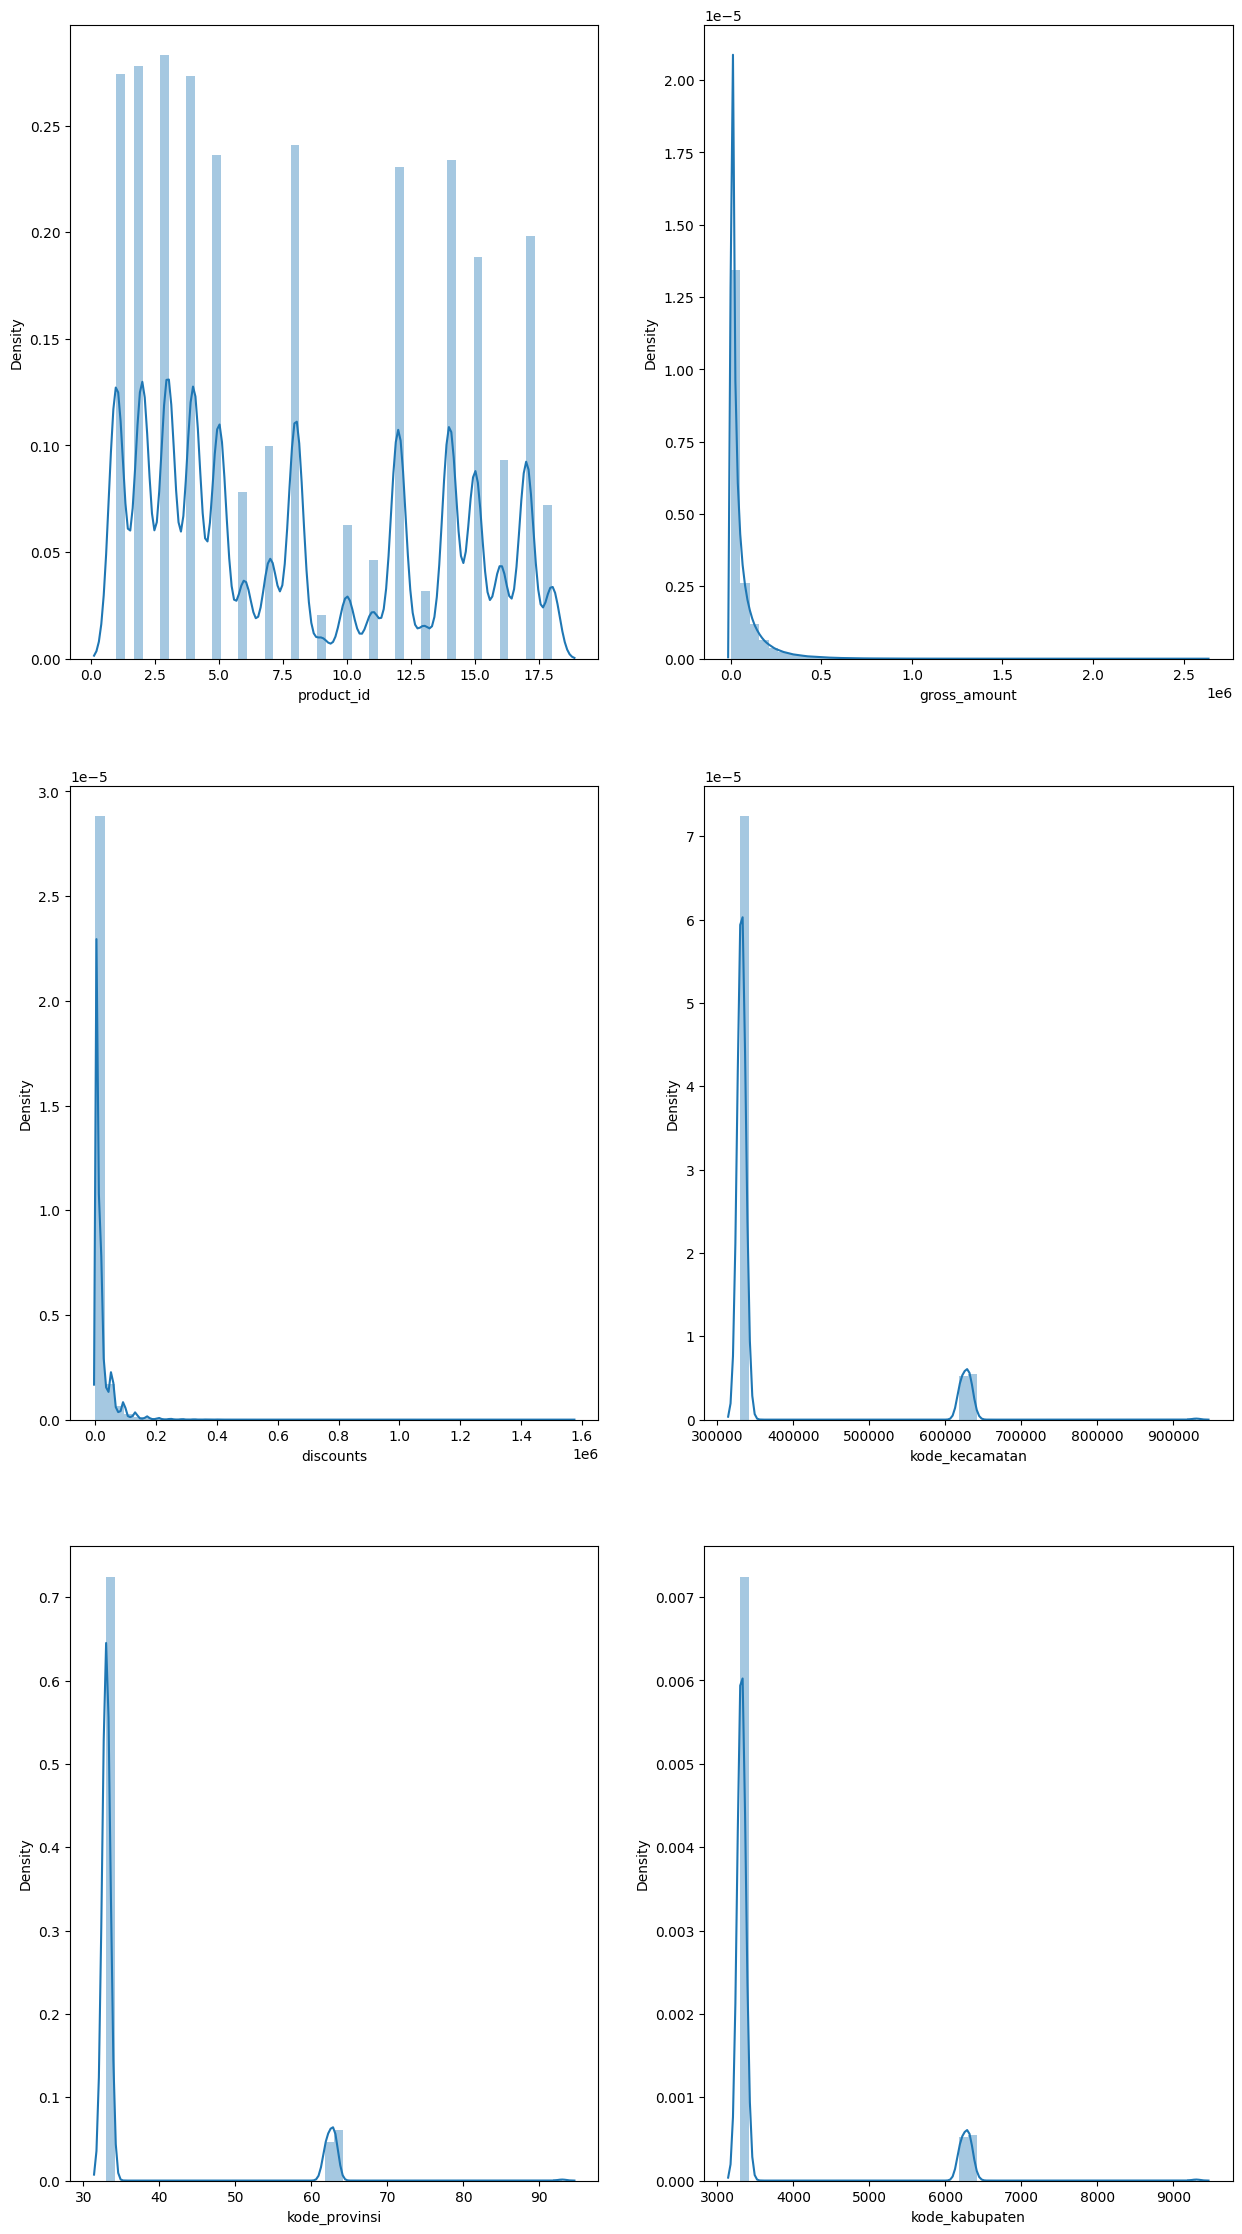

In [ ]:
fig,axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15,28))
for ax, col in list(zip(axes.flat, df_1)):
    sns.distplot(df_1[col], ax = ax)

##Jumlah Produk yang Tiap Kategori

In [ ]:
produk = df_dataset.groupby(['product_name']).size()

# Mengubah hasil pengelompokkan menjadi DataFrame
df_produk = produk.reset_index(name = 'jumlah')

# Menampilkan DataFrame yang telah dikelompokkan
df_produk

,product_name,jumlah
0,Elektronik,198141
1,Food & Drink,232940
2,Hotel,163058
3,Investasi,155005
4,Keperluan Anak,82111
5,Keperluan Rumah Tangga,194213
6,Kesehatan,192346
7,Man Fashion,225376
8,Other,16861
9,Otomotif,189625


##Jumlah Transaksi Tiap Kabupaten

In [ ]:
daerah = df_dataset.groupby(['nama_provinsi', 'nama_kabupaten']).size()

# Mengubah hasil pengelompokkan menjadi DataFrame
df_daerah = daerah.reset_index(name = 'Transaction_Count')

# Menampilkan DataFrame yang telah dikelompokkan
df_daerah

,nama_provinsi,nama_kabupaten,Transaction_Count
0,JAWA TENGAH,BANJARNEGARA,69686
1,JAWA TENGAH,BANYUMAS,94026
2,JAWA TENGAH,BATANG,29466
3,JAWA TENGAH,BLORA,62955
4,JAWA TENGAH,BOYOLALI,60762
...,...,...,...
60,KALIMANTAN TENGAH,SERUYAN,7688
61,KALIMANTAN TENGAH,SUKAMARA,4705
62,PAPUA SELATAN,BOVEN DIGOEL,245
63,PAPUA SELATAN,MAPPI,110


# Feature Engineering

## Menambahkan Fitur Pengeluaran Bersih

In [ ]:
# Total Spending (Pengeluaran Bersih)
df_dataset['pengeluaran_bersih'] = df_dataset['gross_amount'] - df_dataset['discounts']

In [ ]:
total_spent_per_user = df_dataset.groupby('user_id')['pengeluaran_bersih'].sum().reset_index()
total_spent_per_user

,user_id,pengeluaran_bersih
0,SC3301012001002,1570700.0
1,SC3301012001003,1603400.0
2,SC3301012001004,1673600.0
3,SC3301012001005,1457400.0
4,SC3301012001006,1721100.0
...,...,...
78522,SC9302032009001,960000.0
78523,SC9303052006001,2210000.0
78524,SC9303052013001,1090400.0
78525,SC9303052013002,1196400.0


In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418907 entries, 0 to 2418906
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id_trx              object 
 1   user_id             object 
 2   product_id          int64  
 3   gross_amount        float64
 4   discounts           float64
 5   transaction_date    object 
 6   product_name        object 
 7   kode_kecamatan      int64  
 8   nama_provinsi       object 
 9   kode_provinsi       int64  
 10  nama_kabupaten      object 
 11  kode_kabupaten      int64  
 12  nama_kecamatan      object 
 13  full_name           object 
 14  gender              object 
 15  join_date           object 
 16  birth               object 
 17  pengeluaran_bersih  float64
dtypes: float64(3), int64(4), object(11)
memory usage: 332.2+ MB


## Menambahkan Fitur Umur

In [ ]:
from datetime import date

# Pastikan kolom birth dalam format datetime
df_dataset['birth'] = pd.to_datetime(df_dataset['birth'], format='%Y-%m-%d')

# Tentukan tanggal saat ini
today = pd.Timestamp(date.today())

# Hitung umur
df_dataset['age'] = today.year - df_dataset['birth'].dt.year - (((df_dataset['birth'].dt.day > today.day) & (df_dataset['birth'].dt.month == today.month)) | (df_dataset['birth'].dt.month>today.month))

# Menampilkan Data Frame
df_dataset

,id_trx,user_id,product_id,gross_amount,discounts,transaction_date,product_name,kode_kecamatan,nama_provinsi,kode_provinsi,nama_kabupaten,kode_kabupaten,nama_kecamatan,full_name,gender,join_date,birth,pengeluaran_bersih,age
0,TRX679679,SC3304092002002,1,24500.0,0.0,2024-11-08,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,24500.0,38
1,TRX679680,SC3304092002002,1,68800.0,0.0,2024-04-11,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,68800.0,38
2,TRX679681,SC3304092002002,1,26700.0,26700.0,2024-07-01,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,0.0,38
3,TRX679682,SC3304092002002,2,27100.0,0.0,2024-02-07,Woman Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,27100.0,38
4,TRX679683,SC3304092002002,2,78300.0,0.0,2024-03-12,Woman Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,78300.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418902,TRX634418,SC6203092020002,10,1100.0,0.0,2024-01-05,"Transportasi (Kereta, Pesawat, Kapal)",620309,KALIMANTAN TENGAH,62,KAPUAS,6203,MANTANGAI,KENNY,perempuan,2024-10-22,2005-06-09,1100.0,18
2418903,TRX634419,SC6203092020002,10,2600.0,0.0,2024-07-09,"Transportasi (Kereta, Pesawat, Kapal)",620309,KALIMANTAN TENGAH,62,KAPUAS,6203,MANTANGAI,KENNY,perempuan,2024-10-22,2005-06-09,2600.0,18
2418904,TRX595914,SC6204012005001,6,12200.0,0.0,2024-06-18,Travel,620401,KALIMANTAN TENGAH,62,BARITO SELATAN,6204,JENAMAS,ILHAM SUPRATIKNO S.H.,laki-laki,2023-12-08,1993-12-09,12200.0,30
2418905,TRX595915,SC6204012005001,6,1600.0,0.0,2024-04-04,Travel,620401,KALIMANTAN TENGAH,62,BARITO SELATAN,6204,JENAMAS,ILHAM SUPRATIKNO S.H.,laki-laki,2023-12-08,1993-12-09,1600.0,30


## Encoding Gender

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Terapkan LabelEncoder ke kolom 'gender'
df_dataset['gender_encoded'] = le.fit_transform(df_dataset['gender'])

df_dataset.head(20)

,id_trx,user_id,product_id,gross_amount,discounts,transaction_date,product_name,kode_kecamatan,nama_provinsi,kode_provinsi,nama_kabupaten,kode_kabupaten,nama_kecamatan,full_name,gender,join_date,birth,pengeluaran_bersih,age,gender_encoded
0,TRX679679,SC3304092002002,1,24500.0,0.0,2024-11-08,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,24500.0,38,1
1,TRX679680,SC3304092002002,1,68800.0,0.0,2024-04-11,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,68800.0,38,1
2,TRX679681,SC3304092002002,1,26700.0,26700.0,2024-07-01,Man Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,0.0,38,1
3,TRX679682,SC3304092002002,2,27100.0,0.0,2024-02-07,Woman Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,27100.0,38,1
4,TRX679683,SC3304092002002,2,78300.0,0.0,2024-03-12,Woman Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,78300.0,38,1
5,TRX679684,SC3304092002002,2,93400.0,51200.0,2024-05-30,Woman Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,42200.0,38,1
6,TRX679685,SC3304092002002,2,51200.0,28800.0,2024-09-10,Woman Fashion,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,22400.0,38,1
7,TRX679686,SC3304092002002,3,37000.0,0.0,2024-04-30,Food & Drink,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,37000.0,38,1
8,TRX679687,SC3304092002002,3,18000.0,0.0,2024-04-25,Food & Drink,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,18000.0,38,1
9,TRX679688,SC3304092002002,3,8100.0,8100.0,2024-05-27,Food & Drink,330409,JAWA TENGAH,33,BANJARNEGARA,3304,BANJARMANGU,TUTIK,perempuan,2023-11-26,1986-02-01,0.0,38,1


## Extract Datetime

In [ ]:
# Code extract datetime
df_dataset['Dates'] = pd.to_datetime(df_dataset['transaction_date']).dt.date

# Code for convert to datetime in new features od date
df_dataset['Dates'] = df_dataset['Dates'].astype('datetime64[ns]')

# Code for datetime in a way create a new columns breaking down datetime in day, month, year
df_dataset['day'] = df_dataset['Dates'].dt.day_name()
df_dataset['month'] = df_dataset['Dates'].dt.month_name()
df_dataset['year'] = df_dataset['Dates'].dt.year

In [ ]:
df_dataset.head()

,id_trx,user_id,product_id,gross_amount,discounts,transaction_date,product_name,kode_kecamatan,nama_provinsi,kode_provinsi,...,gender,join_date,birth,pengeluaran_bersih,age,gender_encoded,Dates,day,month,year
0,TRX679679,SC3304092002002,1,24500.0,0.0,2024-11-08,Man Fashion,330409,JAWA TENGAH,33,...,perempuan,2023-11-26,1986-02-01,24500.0,38,1,2024-11-08,Friday,November,2024
1,TRX679680,SC3304092002002,1,68800.0,0.0,2024-04-11,Man Fashion,330409,JAWA TENGAH,33,...,perempuan,2023-11-26,1986-02-01,68800.0,38,1,2024-04-11,Thursday,April,2024
2,TRX679681,SC3304092002002,1,26700.0,26700.0,2024-07-01,Man Fashion,330409,JAWA TENGAH,33,...,perempuan,2023-11-26,1986-02-01,0.0,38,1,2024-07-01,Monday,July,2024
3,TRX679682,SC3304092002002,2,27100.0,0.0,2024-02-07,Woman Fashion,330409,JAWA TENGAH,33,...,perempuan,2023-11-26,1986-02-01,27100.0,38,1,2024-02-07,Wednesday,February,2024
4,TRX679683,SC3304092002002,2,78300.0,0.0,2024-03-12,Woman Fashion,330409,JAWA TENGAH,33,...,perempuan,2023-11-26,1986-02-01,78300.0,38,1,2024-03-12,Tuesday,March,2024


## Burn Rate

In [ ]:
# Hitung burn rate sebagai persentase dengan pengecekan zero division
def calculate_burn_rate_percentage(gross_amount, discounts):
    if gross_amount == 0:
        return 0  # atau bisa juga None atau nilai lain yang diinginkan
    return (discounts / gross_amount) * 100

# Menerapkan fungsi ke setiap baris dalam DataFrame
df_dataset['burn_rate'] = df_dataset.apply(
    lambda row: calculate_burn_rate_percentage(row['gross_amount'], row['discounts']), axis=1)

# Menampilkan dataframe
df_dataset

,id_trx,user_id,product_id,gross_amount,discounts,transaction_date,product_name,kode_kecamatan,nama_provinsi,kode_provinsi,...,join_date,birth,pengeluaran_bersih,age,gender_encoded,Dates,day,month,year,burn_rate
0,TRX679679,SC3304092002002,1,24500.0,0.0,2024-11-08,Man Fashion,330409,JAWA TENGAH,33,...,2023-11-26,1986-02-01,24500.0,38,1,2024-11-08,Friday,November,2024,0.0
1,TRX679680,SC3304092002002,1,68800.0,0.0,2024-04-11,Man Fashion,330409,JAWA TENGAH,33,...,2023-11-26,1986-02-01,68800.0,38,1,2024-04-11,Thursday,April,2024,0.0
2,TRX679681,SC3304092002002,1,26700.0,26700.0,2024-07-01,Man Fashion,330409,JAWA TENGAH,33,...,2023-11-26,1986-02-01,0.0,38,1,2024-07-01,Monday,July,2024,100.0
3,TRX679682,SC3304092002002,2,27100.0,0.0,2024-02-07,Woman Fashion,330409,JAWA TENGAH,33,...,2023-11-26,1986-02-01,27100.0,38,1,2024-02-07,Wednesday,February,2024,0.0
4,TRX679683,SC3304092002002,2,78300.0,0.0,2024-03-12,Woman Fashion,330409,JAWA TENGAH,33,...,2023-11-26,1986-02-01,78300.0,38,1,2024-03-12,Tuesday,March,2024,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418902,TRX634418,SC6203092020002,10,1100.0,0.0,2024-01-05,"Transportasi (Kereta, Pesawat, Kapal)",620309,KALIMANTAN TENGAH,62,...,2024-10-22,2005-06-09,1100.0,18,1,2024-01-05,Friday,January,2024,0.0
2418903,TRX634419,SC6203092020002,10,2600.0,0.0,2024-07-09,"Transportasi (Kereta, Pesawat, Kapal)",620309,KALIMANTAN TENGAH,62,...,2024-10-22,2005-06-09,2600.0,18,1,2024-07-09,Tuesday,July,2024,0.0
2418904,TRX595914,SC6204012005001,6,12200.0,0.0,2024-06-18,Travel,620401,KALIMANTAN TENGAH,62,...,2023-12-08,1993-12-09,12200.0,30,0,2024-06-18,Tuesday,June,2024,0.0
2418905,TRX595915,SC6204012005001,6,1600.0,0.0,2024-04-04,Travel,620401,KALIMANTAN TENGAH,62,...,2023-12-08,1993-12-09,1600.0,30,0,2024-04-04,Thursday,April,2024,0.0


In [ ]:
df_dataset.columns

Index(['id_trx', 'user_id', 'product_id', 'gross_amount', 'discounts',
       'transaction_date', 'product_name', 'kode_kecamatan', 'nama_provinsi',
       'kode_provinsi', 'nama_kabupaten', 'kode_kabupaten', 'nama_kecamatan',
       'full_name', 'gender', 'join_date', 'birth', 'pengeluaran_bersih',
       'age', 'gender_encoded', 'Dates', 'day', 'month', 'year', 'burn_rate'],
      dtype='object')

# Analisa RFM

Analisis RFM (Recency, Frequency, Monetary) adalah metode yang digunakan untuk menggolongkan customer berdasarkan tiga ukuran utama:

* Recency (R) : Mengukur seberapa “segar” atau baru customer melakukan transaksi terakhir. Semakin baru transaksi, semakin tinggi skor recency.
* Frequency (F): Mengukur seberapa sering customer melakukan transaksi dalam periode waktu tertentu. Pelanggan yang sering bertransaksi akan memiliki skor frequency yang lebih tinggi.
* Monetary (M): Mengukur total nilai transaksi yang dilakukan oleh customer. Pelanggan yang menghabiskan lebih banyak uang akan memiliki skor monetary yang lebih tinggi.

In [ ]:
from datetime import timedelta
df_dataset['transaction_date'] = pd.to_datetime(df_dataset['transaction_date'])

# Menghitung tanggal snapshot menggunakan tanggal transaksi terbaru
Snapshot_Date = df_dataset['transaction_date'].max() + timedelta(days=1)
print("Last Invoice Date: ", df_dataset['transaction_date'].max())
print("Recency/Snapshot Date: ", Snapshot_Date)

Last Invoice Date:  2024-12-31 00:00:00
Recency/Snapshot Date:  2025-01-01 00:00:00


In [ ]:
df_dataset.head()

,id_trx,user_id,product_id,gross_amount,discounts,transaction_date,product_name,kode_kecamatan,nama_provinsi,kode_provinsi,...,join_date,birth,pengeluaran_bersih,age,gender_encoded,Dates,day,month,year,burn_rate
0,TRX679679,SC3304092002002,1,24500.0,0.0,2024-11-08,Man Fashion,330409,JAWA TENGAH,33,...,2023-11-26,1986-02-01,24500.0,38,1,2024-11-08,Friday,November,2024,0.0
1,TRX679680,SC3304092002002,1,68800.0,0.0,2024-04-11,Man Fashion,330409,JAWA TENGAH,33,...,2023-11-26,1986-02-01,68800.0,38,1,2024-04-11,Thursday,April,2024,0.0
2,TRX679681,SC3304092002002,1,26700.0,26700.0,2024-07-01,Man Fashion,330409,JAWA TENGAH,33,...,2023-11-26,1986-02-01,0.0,38,1,2024-07-01,Monday,July,2024,100.0
3,TRX679682,SC3304092002002,2,27100.0,0.0,2024-02-07,Woman Fashion,330409,JAWA TENGAH,33,...,2023-11-26,1986-02-01,27100.0,38,1,2024-02-07,Wednesday,February,2024,0.0
4,TRX679683,SC3304092002002,2,78300.0,0.0,2024-03-12,Woman Fashion,330409,JAWA TENGAH,33,...,2023-11-26,1986-02-01,78300.0,38,1,2024-03-12,Tuesday,March,2024,0.0


In [ ]:
RFM = df_dataset.groupby(['user_id']).agg(
    Recency=("transaction_date", lambda x: (Snapshot_Date - x.max()).days),
    Frequency=("id_trx", "count"),
    MonetaryValue=("pengeluaran_bersih","sum")
)
RFM.rename(columns={'transaction_date': 'Recency', 'id_trx': 'Frequency', 'pengeluaran_bersih': 'MonetaryValue'}, inplace=True)
display(RFM)

,Recency,Frequency,MonetaryValue
user_id,,,
SC3301012001002,2,36,1570700.0
SC3301012001003,26,30,1603400.0
SC3301012001004,14,24,1673600.0
SC3301012001005,14,31,1457400.0
SC3301012001006,3,36,1721100.0
...,...,...,...
SC9302032009001,11,21,960000.0
SC9303052006001,110,10,2210000.0
SC9303052013001,15,27,1090400.0


In [ ]:
#Recency = Latest Date - Last transaction Data,
#Frequency = count of  no. of transaction(s),
#Monetary = Sum of Total revenue
#Amount for each customer
import datetime as dt

Latest_Date = dt.datetime(2025,1,1)

#Create RFM Modelling scores for each customer
RFMScores = df_dataset.groupby('user_id').agg({'transaction_date': lambda x: (Latest_Date - x.max()).days, 'id_trx': lambda x: len(x), 'pengeluaran_bersih': lambda x: x.sum()})

#Convert transaction Date into type int
RFMScores['transaction_date'] = RFMScores['transaction_date'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'transaction_date': 'Recency',
                         'id_trx': 'Frequency',
                         'pengeluaran_bersih': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,user_id,Recency,Frequency,Monetary
0,SC3301012001002,2,36,1570700.0
1,SC3301012001003,26,30,1603400.0
2,SC3301012001004,14,24,1673600.0
3,SC3301012001005,14,31,1457400.0
4,SC3301012001006,3,36,1721100.0


In [ ]:
RFM.head()

,Recency,Frequency,MonetaryValue
user_id,,,
SC3301012001002,2,36,1570700.0
SC3301012001003,26,30,1603400.0
SC3301012001004,14,24,1673600.0
SC3301012001005,14,31,1457400.0
SC3301012001006,3,36,1721100.0


In [ ]:
RFMScores.head()

,Recency,Frequency,Monetary
user_id,,,
SC3301012001002,2,36,1570700.0
SC3301012001003,26,30,1603400.0
SC3301012001004,14,24,1673600.0
SC3301012001005,14,31,1457400.0
SC3301012001006,3,36,1721100.0


Skor yang lebih rendah untuk Recency menunjukkan pelanggan yang lebih baru bertransaksi, sedangkan skor yang lebih tinggi untuk Frequency pelanggan melakukan transaksi dan Monetary menunjukkan pelanggan yang lebih sering bertransaksi dan menghabiskan lebih banyak uang untuk belanja

In [ ]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    78527.000000
mean        13.296675
std         13.825272
min          1.000000
25%          4.000000
50%          9.000000
75%         18.000000
max        358.000000
Name: Recency, dtype: float64

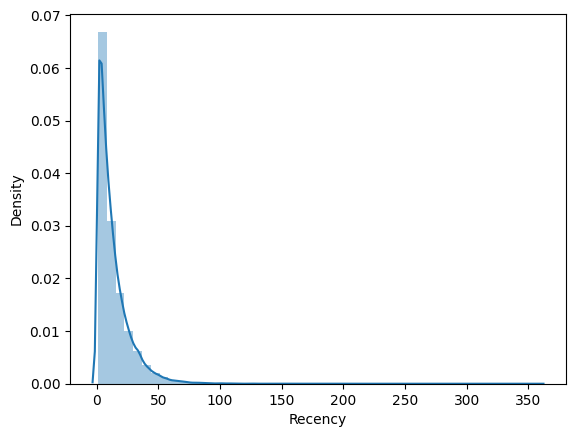

In [ ]:
#Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

* Konsentrasi Tinggi pada Nilai Rendah: Puncak tajam di sisi kiri menunjukkan bahwa sebagian besar pelanggan baru-baru ini berinteraksi dengan bisnis, yang ditandai dengan nilai Recency yang rendah.
* Penurunan Frekuensi: Seiring bertambahnya nilai Recency, frekuensi pelanggan yang berinteraksi menurun, yang ditunjukkan oleh tinggi batang histogram yang semakin menurun.
* Interaksi Awal Lebih Sering: Distribusi ini menunjukkan bahwa pelanggan cenderung lebih sering berinteraksi dalam periode waktu yang singkat setelah interaksi awal, dengan interaksi menjadi lebih jarang seiring berjalannya waktu.

In [ ]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    78527.000000
mean        30.803507
std          6.922551
min          2.000000
25%         26.000000
50%         31.000000
75%         35.000000
max         60.000000
Name: Frequency, dtype: float64

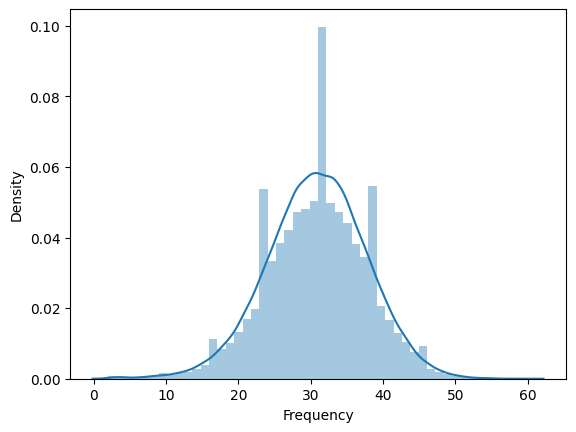

In [ ]:
import seaborn as sns
x = RFMScores['Frequency']

ax = sns.distplot(x)

Konsentrasi Frequency, masih cenderung di rata rata terdistribusi kepadatan frequency transaksi di angka sekitrar 30 kali. rata-rata customer yang melakukan transaksi cenderung berdistribusi normal

In [ ]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count    7.852700e+04
mean     1.442623e+06
std      3.683923e+05
min      0.000000e+00
25%      1.215700e+06
50%      1.450800e+06
75%      1.674000e+06
max      3.142000e+07
Name: Monetary, dtype: float64

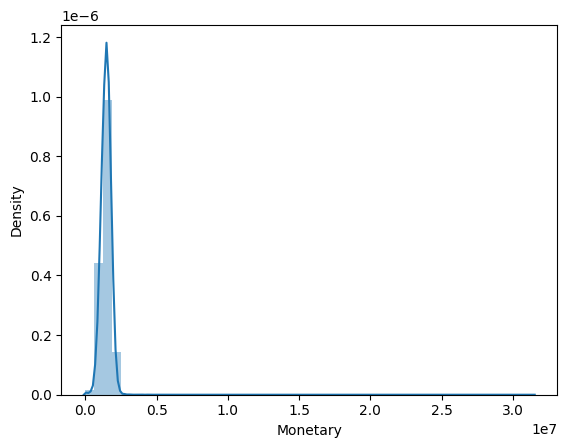

In [ ]:
import seaborn as sns
x = RFMScores['Monetary']

ax = sns.distplot(x)

Distribusi masih tidak terlalu dominan di angka monetary yang tinggi, kepadatan tertinggi masih dengan banyaknya entitas customer yang monetary dalam transaksi tidak terlalu besar

In [ ]:
# Ini menentukan batas untuk segmentasi skor RFM
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()


In [ ]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
user_id,,,,,,
SC3301012001002,2,36,1570700.0,1,1,2
SC3301012001003,26,30,1603400.0,4,3,2
SC3301012001004,14,24,1673600.0,3,4,2
SC3301012001005,14,31,1457400.0,3,3,2
SC3301012001006,3,36,1721100.0,1,1,1


In [ ]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
user_id,,,,,,,,
SC3301012001002,2,36,1570700.0,1,1,2,112,4
SC3301012001003,26,30,1603400.0,4,3,2,432,9
SC3301012001004,14,24,1673600.0,3,4,2,342,9
SC3301012001005,14,31,1457400.0,3,3,2,332,8
SC3301012001006,3,36,1721100.0,1,1,1,111,3


In [ ]:
RFMScores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78527 entries, SC3301012001002 to SC9303052017001
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    78527 non-null  int64  
 1   Frequency  78527 non-null  int64  
 2   Monetary   78527 non-null  float64
 3   R          78527 non-null  int64  
 4   F          78527 non-null  int64  
 5   M          78527 non-null  int64  
 6   RFMGroup   78527 non-null  object 
 7   RFMScore   78527 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 5.4+ MB


In [ ]:
# mengelompokkan 4 kategori golongan pada setiap performa customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)# membagi akor RFM menjadi 4 kuantil sama besar
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values # kolom baru untuk nilai loyalitas perfoma customer
RFMScores.reset_index().head()

,user_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,SC3301012001002,2,36,1570700.0,1,1,2,112,4,Platinum
1,SC3301012001003,26,30,1603400.0,4,3,2,432,9,Silver
2,SC3301012001004,14,24,1673600.0,3,4,2,342,9,Silver
3,SC3301012001005,14,31,1457400.0,3,3,2,332,8,Silver
4,SC3301012001006,3,36,1721100.0,1,1,1,111,3,Platinum


In [ ]:
RFMScores

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
user_id,,,,,,,,,
SC3301012001002,2,36,1570700.0,1,1,2,112,4,Platinum
SC3301012001003,26,30,1603400.0,4,3,2,432,9,Silver
SC3301012001004,14,24,1673600.0,3,4,2,342,9,Silver
SC3301012001005,14,31,1457400.0,3,3,2,332,8,Silver
SC3301012001006,3,36,1721100.0,1,1,1,111,3,Platinum
...,...,...,...,...,...,...,...,...,...
SC9302032009001,11,21,960000.0,3,4,4,344,11,Bronze
SC9303052006001,110,10,2210000.0,4,4,1,441,9,Silver
SC9303052013001,15,27,1090400.0,3,3,4,334,10,Bronze


In [ ]:
RFMScores["RFM_Loyalty_Level"].value_counts()

RFM_Loyalty_Level
Platinum    27062
Silver      24089
Bronze      14469
Gold        12907
Name: count, dtype: int64

dari 78527 customer, berdasarkan analisa RFM.
Tersegment loyalitas customer

* Customer Platinum sebanyak 27062
* Customer Silver sebanyak 24089
* Customer Bronze sebanyak 14469
* Customer Gold sebanyak 12907

In [ ]:
rata_rata_rfm = RFMScores.groupby('RFM_Loyalty_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

In [ ]:
def format_decimal(value):
    if isinstance(value, (int, float)):
        return f"{value:.2f}"
    else:
        return value

In [ ]:
rata_rata_rfm = rata_rata_rfm.applymap(format_decimal)

In [ ]:
rata_rata_rfm

,RFM_Loyalty_Level,Recency,Frequency,Monetary
0,Platinum,5.98,35.70,1646395.67
1,Gold,10.42,32.02,1487632.01
2,Silver,15.59,28.58,1381164.65
3,Bronze,25.73,24.27,1123669.12


Berikut adalah interpretasi dari hasil segmentasi loyalitas pelanggan berdasarkan analisis RFM yang kami peroleh:


Berdasarkan data yang di berikan, berikut adalah interpretasi dari hasil segmentasi loyalitas pelanggan melalui RFM:


* Pelanggan Platinum (34.44%): Ini adalah segmen terbesar Anda, menunjukkan bahwa sejumlah besar pelanggan sangat aktif dan menghasilkan pendapatan yang signifikan. Strategi yang dapat diterapkan termasuk program loyalitas yang lebih dipersonalisasi, penawaran eksklusif, dan layanan prioritas untuk mempertahankan dan meningkatkan kepuasan mereka.
* Pelanggan Gold (16.43%): Meskipun merupakan segmen terkecil, pelanggan Gold mungkin memiliki potensi untuk menjadi Platinum. Program penghargaan dan insentif dapat mendorong mereka untuk berbelanja lebih sering dan meningkatkan kontribusi mereka terhadap pendapatan.
* Pelanggan Silver (30.65%): Segmen ini juga cukup besar dan mungkin terdiri dari pelanggan yang sering berbelanja tetapi dengan jumlah yang lebih kecil per transaksi. Mereka adalah kandidat yang baik untuk promosi yang dirancang untuk meningkatkan frekuensi dan nilai pembelian mereka.
* Pelanggan Bronze (18.42%): Pelanggan ini mungkin baru atau tidak sering berbelanja. Mereka bisa menjadi target untuk kampanye re-engagement dan up-selling untuk meningkatkan frekuensi dan nilai transaksi mereka.
